In [1]:
import sys
sys.path.append(rf'D:\code\pywfn')

from pywfn.base import Mol
from pywfn.reader import LogReader
from pywfn.atomprop import activity

import matplotlib.pyplot as plt
import numpy as np

In [103]:
def calc_result(root:str,atm:int):
    paths=['-','0','+']
    results=[]
    for p,each in enumerate(paths):
        path=fr'{root}{each}.log'
        mol=Mol(LogReader(path))
        caler=activity.Calculator()
        caler.mols=[mol]
        result=caler.freeValence(atm)
        results.append(result)
    return results

def show_result(results):
    xs=np.linspace(0,180,19)
    xts=np.linspace(0,180,17,endpoint=True)
    xtl=[f'{e:.0f}°' for e in xts]

    labels=['-','0','+']
    fig,axs=plt.subplots(1,2,figsize=(10,4))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=None)
    cs=['#339af0','#868e96','#fa5252']
    for p,result in enumerate(results):
        axs[0].plot(xs,result[:,-1],marker='.',color=cs[p],label=labels[p])
    axs[0].set_ylabel('$F_{max}$')
    axs[0].set_xlabel(r'Angle [°]')
    axs[0].set_xticks(xts[::4],xtl[::4])
    eval=results[0][:,-1]-results[1][:,-1]
    nval=results[2][:,-1]-results[1][:,-1]
    # print(f'{np.max(eval):10.4f},{np.max(nval):10.4f}')
    axs[1].plot(xs,eval,marker='.',color='b')
    axs[1].plot(xs,nval,marker='.',color='r')
    axs[1].set_xticks(xts[::4],xtl[::4])
    axs[1].set_ylabel(r'$\Delta F_{max}$')
    axs[1].set_xlabel(r'Angle [°]')
    plt.savefig('freevalence.png',bbox_inches='tight')

def print_result(results:list[np.ndarray]):
    atms=results[0][:,0]
    xyzs=results[0][:,1:4]
    eval=results[0][:,-1]-results[1][:,-1]
    nval=results[2][:,-1]-results[1][:,-1]
    vals=eval
    minv=np.min(vals)
    for i in range(len(atms)):
        a=atms[i]
        x,y,z=xyzs[i,:]
        v=vals[i]-minv
        print(f'[{a:.0f},{x:>.4f},{y:>.4f},{z:>.4f},{v:>.4f}],')

In [5]:
root=rf"D:\BaiduSyncdisk\Articles\HFV\gfile\NHC\NHC-wfn"
results1=calc_result(root,1)

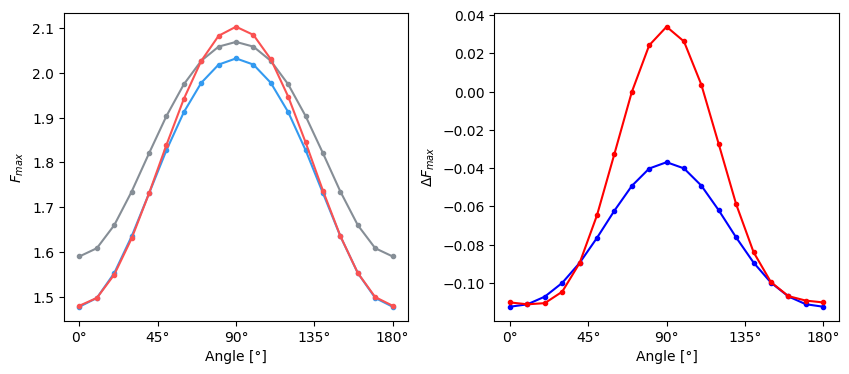

In [69]:
show_result(results1)

In [10]:
root=rf"D:\BaiduSyncdisk\Articles\HFV\gfile\NHC\since4_s_wfn"
results2=calc_result(root,13)

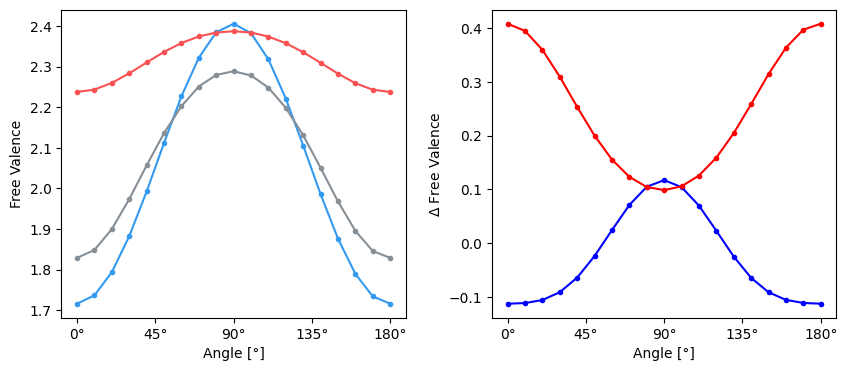

In [67]:
show_result(results2)

In [107]:
max(results2[0][:,-1]-results2[1][:,-1])

0.1170961948527367

In [105]:
results2

[array([[13.    , -0.0533,  0.8157, -0.576 ,  1.716 ],
        [13.    , -0.2258,  0.7954, -0.5625,  1.7366],
        [13.    , -0.3916,  0.7509, -0.5318,  1.7938],
        [13.    , -0.5454,  0.6836, -0.485 ,  1.8822],
        [13.    , -0.6827,  0.5955, -0.4235,  1.9924],
        [13.    , -0.7992,  0.4893, -0.3491,  2.112 ],
        [13.    , -0.8914,  0.3683, -0.2641,  2.2268],
        [13.    , -0.9566,  0.236 , -0.1711,  2.3219],
        [13.    , -0.9927,  0.0966, -0.0728,  2.3844],
        [13.    , -0.9986, -0.0457,  0.0276,  2.4055],
        [13.    , -0.9742, -0.1867,  0.1272,  2.3822],
        [13.    , -0.9201, -0.3219,  0.2229,  2.3177],
        [13.    , -0.8382, -0.4474,  0.3119,  2.2211],
        [13.    , -0.7307, -0.5593,  0.3914,  2.1055],
        [13.    , -0.6011, -0.6543,  0.459 ,  1.9857],
        [13.    , -0.4532, -0.7293,  0.5126,  1.8762],
        [13.    , -0.2915, -0.7822,  0.5507,  1.7893],
        [13.    , -0.121 , -0.8113,  0.572 ,  1.7341],
        [1